<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Section-5-6-7.3" data-toc-modified-id="Section-5-6-7.3-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Section 5-6-7.3</a></span><ul class="toc-item"><li><span><a href="#Question-1" data-toc-modified-id="Question-1-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Question 1</a></span></li><li><span><a href="#Question-2" data-toc-modified-id="Question-2-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Question 2</a></span></li><li><span><a href="#Question-3" data-toc-modified-id="Question-3-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Question 3</a></span></li><li><span><a href="#Question-4" data-toc-modified-id="Question-4-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Question 4</a></span></li><li><span><a href="#Question-5" data-toc-modified-id="Question-5-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Question 5</a></span></li><li><span><a href="#Question-6" data-toc-modified-id="Question-6-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Question 6</a></span></li><li><span><a href="#Question-7" data-toc-modified-id="Question-7-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Question 7</a></span></li><li><span><a href="#Question-8" data-toc-modified-id="Question-8-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Question 8</a></span></li><li><span><a href="#Question-9" data-toc-modified-id="Question-9-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Question 9</a></span><ul class="toc-item"><li><span><a href="#Sidebar:-Monte-carlo-simulation" data-toc-modified-id="Sidebar:-Monte-carlo-simulation-1.9.1"><span class="toc-item-num">1.9.1&nbsp;&nbsp;</span>Sidebar: Monte carlo simulation</a></span></li></ul></li><li><span><a href="#Question-10" data-toc-modified-id="Question-10-1.10"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>Question 10</a></span></li></ul></li><li><span><a href="#Section-5-6-7.4" data-toc-modified-id="Section-5-6-7.4-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Section 5-6-7.4</a></span><ul class="toc-item"><li><span><a href="#Question-1" data-toc-modified-id="Question-1-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Question 1</a></span><ul class="toc-item"><li><span><a href="#Sidebar:-Show-that-this-method-works" data-toc-modified-id="Sidebar:-Show-that-this-method-works-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Sidebar: Show that this method works</a></span></li></ul></li><li><span><a href="#Question-2" data-toc-modified-id="Question-2-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Question 2</a></span></li><li><span><a href="#Question-3" data-toc-modified-id="Question-3-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Question 3</a></span></li></ul></li></ul></div>

In [1]:
import numpy as np
import sympy as sp
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats, optimize
import seaborn as sns
import arviz as az
import xarray as xr

config = {
    'figure.facecolor':'w',
    'axes.grid':True,
    'axes.spines.top':False,
    'axes.spines.bottom':False,
    'axes.spines.left':False,
    'axes.spines.right':False,
    'grid.linewidth':0.5,
    'grid.linestyle':'--',
    'figure.constrained_layout.use':True
}

plt.rcParams.update(config)

# Section 5-6-7.3

Two Risky Assets Portfolio, Captal Market Line and Risk Measures based on Quantiles

The risk-free rate (which can be used to borrow or invest) is assumed to be 3.5%.

Using long-time series, you have estimated the main characteristics associated with the returns of two mutual funds:

|                  | Fund 1       | Fund 2       |
|------------------|-------------|-------------|
| Expected Return  | $$E(r_1) = 20\%$$ | $$E(r_2) = 5\%$$ |
| Variance         | $$\sigma^2(r_1) = 0.0625$$ | $$\sigma^2(r_2) = 0.04$$ |

The correlation coefficient between the returns of Fund 1 and Fund 2 is $\rho_{12} = -0.4$.

For an initial level of wealth $W_0$, the part invested in the risky portfolio is denoted $\alpha$, and thus $1 - \alpha$ is the proportion invested in the risk-free asset. If $W_1$ is the amount invested in risky assets, then $\delta$ is the proportion invested in asset 1, and $1 - \delta$ is the part invested in asset 2.

## Question 1

Using respective values of $\delta = 0, 0.25, 0.5, 0.75$, and $1$, calculate the characteristics (expected return / risk) of the two risky assets portfolio (invested in assets 1 and 2).

As usual, we need to recall the formuals for mean and variance of the portfolios. Remember that these just come from the shifting-scaling rules, together with the convolution of normals:

$$
\begin{align}
\mu &= \delta \mu_1 + (1 - \delta) \mu_2 \\
\sigma^2 &= \delta^2 \sigma_1^2 + (1 - \delta)^2 \sigma_2^2 + 2 \rho \delta (1 - \delta) \sigma_1 \sigma_2 
\end{align}
$$

**Make a dataframe to hold the question data**

In [2]:
df = pd.DataFrame(np.array([[0.2, 0.05], [0.0625, 0.04]]), columns=['Fund 1', 'Fund 2'], index=['mean', 'variance'])
rho = -0.4
df

,Fund 1,Fund 2
mean,0.2000,0.05
variance,0.0625,0.04


**Write some functions to compute the first two moments**

In [3]:
def portfolio_mean(delta, mus):
    deltas = np.c_[delta, 1 - delta]
    return (deltas * mus).sum(axis=-1)

def portfolio_variance(delta, sigmas_sq, rho):
    deltas = np.c_[delta, 1 - delta]
    
    sigma_terms = (deltas ** 2 * sigmas_sq).sum(axis=-1)
    cross_term = 2 * rho * np.prod(np.sqrt(sigmas_sq)) * deltas.prod(axis=-1)
    
    return sigma_terms + cross_term

def portfolio_moments(delta, df, rho):
    mus = df['mean'].values
    sigmas_sq = df['variance'].values
    data = np.r_[[portfolio_mean(delta, mus)],
             [portfolio_variance(delta, sigmas_sq, rho)]]
    solution_df = pd.DataFrame(data, index=['mean', 'variance'], columns=delta.ravel())
    solution_df.columns.name = 'Asset 1 weight'
    solution_df = solution_df.T.assign(std = lambda x: x['variance'] ** 0.5).round(4).sort_index(ascending=False)
    return solution_df

**Compute the portfolio moments**

In [4]:
weights = np.array([0, 0.25, 0.5, 0.75, 1]).reshape(-1, 1)
solution_df = portfolio_moments(weights, df.T, rho)
solution_df

,mean,variance,std
Asset 1 weight,,,
1.00,0.2000,0.0625,0.2500
0.75,0.1625,0.0302,0.1737
0.50,0.1250,0.0156,0.1250
0.25,0.0875,0.0189,0.1375
0.00,0.0500,0.0400,0.2000


## Question 2
Plot the minimum variance frontier

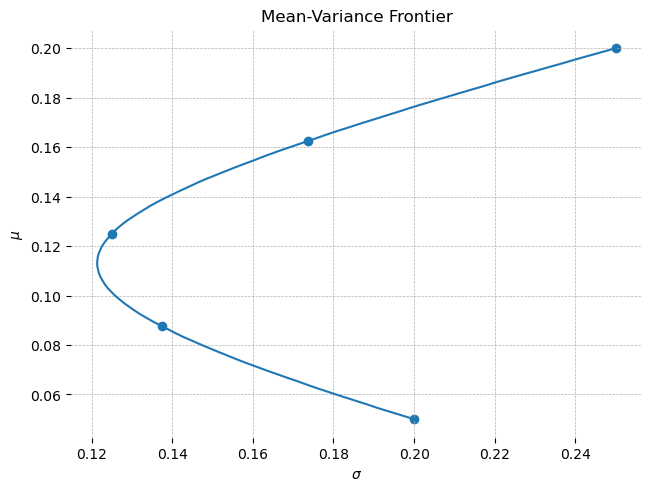

In [5]:
fig, ax = plt.subplots()
more_weights = np.linspace(0, 1, 100)
mvf_df = portfolio_moments(more_weights, df.T, rho)
ax.plot(mvf_df['std'], mvf_df['mean'])
ax.scatter(solution_df['std'], solution_df['mean'])
ax.set(xlabel='$\sigma$', ylabel='$\mu$', title='Mean-Variance Frontier')
plt.show()

## Question 3

What are the variance-minimizing portfolio weights?

Recall the formula we derived last time:

$$w = \frac{\sigma_b^2 - \rho \sigma_a \sigma_b}{\sigma^2_a + \sigma_b^2 - 2 \rho \sigma_a \sigma_b}$$

In [6]:
def compute_w_star(s2_1, s2_2, rho):
    s1, s2 = s2_1 ** 0.5, s2_2 ** 0.5
    cross_term = rho * s1 * s2
    
    top = s2_2 - cross_term
    bot = s2_1 + s2_2 - 2 * cross_term
    return top / bot

In [7]:
w_star = compute_w_star(*df.loc['variance'].values, rho)
print(f'Minimum variance Asset 1 allocation: {w_star:0.3f}')

Minimum variance Asset 1 allocation: 0.421


## Question 4

What are the moments of the minimum variance portfolio?

In [8]:
portfolio_star = pd.Series({'mean':portfolio_mean(w_star, df.loc['mean'].values)[0],
                            'variance':portfolio_variance(w_star, df.loc['variance'].values, rho)[0]})
portfolio_star['std'] = portfolio_star['variance'] ** 0.5
portfolio_star

mean        0.113158
variance    0.014737
std         0.121395
dtype: float64

## Question 5
Plot the minimum variance portfolio and the captial market line.

IMO this question is messed up. To get the tangency portfolio, this is the formula:

$$w_{\text{tan}} = \frac{\rho \sigma_{a} \sigma_{b} \left(\mu_{b} - r_{f}\right) + \sigma_{b}^{2} \left(- \mu_{a} + r_{f}\right)}{\rho \sigma_{a} \sigma_{b} \left(\mu_{a} + \mu_{b} - 2 r_{f}\right) + \sigma_{a}^{2} \left(- \mu_{b} + r_{f}\right) + \sigma_{b}^{2} \left(- \mu_{a} + r_{f}\right)}$$

There's no way you're supposed to memorize this. Please don't. To be honest, I'd do this question by eyeballing it -- try to draw the capital market line with a ruler, and then estimate what the tangency portfolio is.

Anyway, here's the exact computer solution.

In [23]:
def compute_w_tan(mu_a, mu_b, s_a, s_b, rf, rho):
    # Compute the weight associated with the tangency portfolio
    # For details, see the TD05 notebook
    ex_a = mu_a - rf
    ex_b = mu_b - rf
    s2_a = s_a ** 2
    s2_b = s_b ** 2
    cross = rho * s_a * s_b
    
    top = cross * ex_b - s2_b * ex_a
    bot = cross * (mu_a + mu_b - 2 * rf) - s2_a * ex_b - s2_b * ex_a
    
    return top / bot    

**Use the above functions to compute the tangency portfolio**

In [10]:
rf = 0.035
w_tan = compute_w_tan(*df.loc['mean'].values, *df.loc['variance'].values ** 0.5, rf, rho)
print(f'Weight of the tangency portfolio: {w_tan}')

Weight of the tangency portfolio: 0.6195286195286196


**Compute some stuff to plot**
- `alpha_weights` is a range of weights to make the capital market line
- `tan_portfolio` give the moments of the tangency portfolio

To actually plot the CML, we want to use the following formula:

$$ \mathbb \mu_p = r_f + \frac{\mu_{\text{tan}} - r_f}{\sigma_{\text{tan}}} \sigma_p$$

Where:
- $\mu_{\text{tan}}$ and $\sigma_{\text{tan}}$ are the mean and standard deviation of the tangency portfolio
- $\mu_p$ and $\sigma_p$ are the mean and standard deviaton of the portfolio of tangency + risk-free asset

Notice that the slope of the CML is the sharpe ratio of the tangency portfolio!

In [11]:
tan_portfolio = portfolio_moments(w_tan, df.T, rho)
tan_portfolio.index = ['tangency']

**Do the plotting**

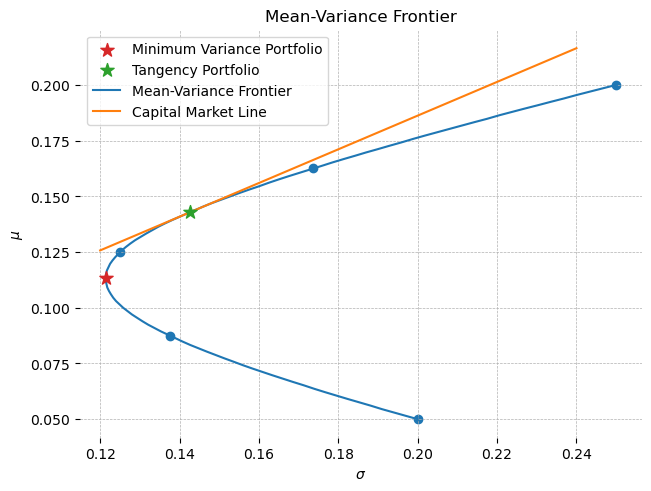

In [22]:
fig, ax = plt.subplots()
ax.scatter(solution_df['std'], solution_df['mean'])
ax.scatter(portfolio_star['std'], portfolio_star['mean'], marker='*', color='tab:red', zorder=10, s=100, label='Minimum Variance Portfolio')
ax.scatter(tan_portfolio['std'], tan_portfolio['mean'], marker='*', color='tab:green', zorder=10, s=100, label='Tangency Portfolio')

xlims, ylims = ax.get_xlim(), ax.get_ylim()
ax.plot(mvf_df['std'], mvf_df['mean'], label='Mean-Variance Frontier')


tan_sharpe = (tan_portfolio['mean'] - rf) / tan_portfolio['std']
sigma_grid = np.linspace(0.12, 0.24, 100)
ax.plot(sigma_grid, rf + tan_sharpe.values * sigma_grid, label='Capital Market Line')
ax.set(xlabel='$\sigma$', ylabel='$\\mu$', title='Mean-Variance Frontier', xlim=xlims)
ax.legend()
plt.show()

## Question 6

Compute the sharpe value associated with the tangency portfolio. Here's a formula you **do** need to know:

$$s = \frac{\mu - r_f}{\sigma}$$

In [13]:
tan_portfolio['sharpe'] = (tan_portfolio['mean'] - rf) / tan_portfolio['std']
tan_portfolio

,mean,variance,std,sharpe
tangency,0.1429,0.0204,0.1427,0.756132


## Question 7

Assuming now that an investor has a risk aversion coefficient $A = 10$ and a Mean-variance utility function. Determine the value $\alpha^*$ and the characteristics $(\mu_x, \sigma_x)$ of this optimal portfolio. Calculate also the level associated with this utility function.

First we need a formula for utility maximizing weights. Recall that the formula for MVU is:

$$U = \mu - \frac{A}{2}\sigma^2$$

And we know that:

$$
\begin{align}
\mu &= \alpha \mu_\text{tan} + (1 - \alpha) r_f\\
\sigma^2 &= \alpha^2 \sigma^2_{\text{tan}}
\end{align}
$$

The $\sigma^2$ expression is simplified by the fact that $r_f$ has no variance, which is great!

Anyway, plug these into the MVU formula and take the derivative with respect to $\alpha$:

$$\max_\alpha \alpha \mu_\text{tan} + (1 - \alpha) r_f - \frac{A}{2} \alpha^2 \sigma^2_{\text{tan}}$$

First order condition:

$$\mu_\text{tan} - r_f - A \alpha \sigma^2_{\text{tan}} = 0$$

Solve for $\alpha^\star$:

$$\alpha^\star = \frac{\mu_\text{tan} - r_f}{A \sigma^2_{\text{tan}}}$$

This is a nice result, notice that it's a **risk-weighted sharpe ratio** 

In [14]:
A = 10
alpha_star_10 = (tan_portfolio['mean'] - rf) / A / tan_portfolio['variance']
alpha_star_10

tangency    0.528922
dtype: float64

In [15]:
tan_portfolio2 = portfolio_moments(w_tan, df.T, rho)
tan_portfolio2.loc['risk-free'] = pd.Series({'mean':rf, 'variance':0, 'std':0})

In [16]:
U_max_portfolio = portfolio_moments(alpha_star_10, tan_portfolio2, 0)
U_max_portfolio.index = ['max utility']
U_max_portfolio

,mean,variance,std
max utility,0.0921,0.0057,0.0755


In [17]:
U_max_portfolio['mean'] - A / 2 * U_max_portfolio['variance']

max utility    0.0636
dtype: float64

## Question 8

This investor has a wealth of 1000€. Indicate how his wealth is allocated between the risk free asset, the optimal risky portfolio, then between portfolio 1 and 2.

This is just applying the weights we've already found. We know that the tangency portfolio has $\delta = 0.62$, and the optimal portfolio weights at $A = 10$ is $\alpha = 0.53$. 

So his wealth is split $53\%$ in tangency portfolio, and $47\%$ in risk-free asset. Of the $53\%$ in tangency, $62\%$ is in asset 1, and $38\%$ is in asset 2. We just have to make these computations

In [35]:
W = 1000
print(f'Wealth in risk-free asset: {W * (1 - alpha_star_10.values[0]):0.2f}' + u'\N{Euro sign}')
print(f'Wealth in tangency portfolio: {W * alpha_star_10.values[0]:0.2f}' + u'\N{Euro sign}')
print(f'Wealth in asset 1: {W * (alpha_star_10 * w_tan).values[0]:0.2f}' + u'\N{Euro sign}')
print(f'Wealth in asset 2: {W * (alpha_star_10 * (1 - w_tan)).values[0]:0.2f}' + u'\N{Euro sign}')

Wealth in risk-free asset: 471.08€
Wealth in tangency portfolio: 528.92€
Wealth in asset 1: 327.68€
Wealth in asset 2: 201.24€


## Question 9

We assume now that all the risky assets returns follow a Gaussian Law, determine the level of wealth below which, over a one year horizon, you may fall according to a level of probability of 5%

This question is asking us what's our VaR(5%). We seek $x$ such that $P(X < x) = 0.05$. We don't know $x$ yet, but we can find the answer for $P(X < z)$ by turning to our trusty z-table. Remember we have to use the "flip around" trick: get $P(X < z) = 0.95$, then flip the sign around.

Consulting the table, we find that $z = -1.65$. Now we can convert from $z$ to $x$ using the following formula:

$$z = \frac{x - \mu}{\sigma}$$

Plug in the moments from this client's optimal portfolio and solve for x:

$$x = \mu_p + \sigma_p z$$

In [39]:
mu_p = U_max_portfolio['mean'].values[0]
sigma_p = U_max_portfolio['std'].values[0]
x = -1.65 * sigma_p + mu_p
print(f'VaR(5%) for customer with A=10: {x:0.2%}')

VaR(5%) for customer with A=10: -3.25%


This gives the VaR in terms of returns, but we can also compute it terms of money by computing $(1 + \text{VaR}(5\%))W_0$

In [49]:
print(f'VaR(5%) losses: {1000 * x:0.2f}' + u'\N{Euro sign}')
print(f'Final wealth given VaR(5%) outcome: {1000 + 1000 * x:0.2f}' + u'\N{Euro sign}')

VaR(5%) losses: -32.47€
Final wealth given VaR(5%) outcome: 967.52€


### Sidebar: Monte carlo simulation

We can always check our math on these questions by doing a simulation. We can draw a bunch of returns from the portfolio, then compute the 5% quantile of the samples. This value will be the VaR(5%).

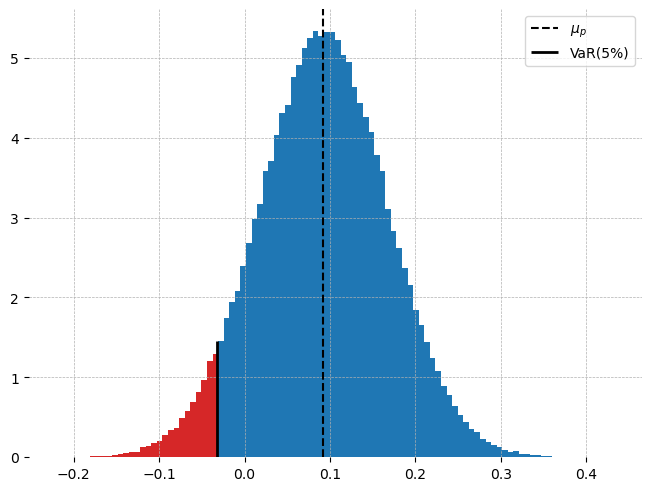

In [83]:
# Create a distribution to represent the portfolio
d = stats.norm(loc=mu_p, scale=sigma_p)

# Draw returns
returns = d.rvs(100_000)

# Compute the 5% quantile
q05 = np.quantile(returns, 0.05)

# Plot a histogram of returns
fig, ax = plt.subplots()
N, bins, patches = ax.hist(returns, bins=100, density=True)
for n, b, patch in zip(N, bins, patches):
    if b < q05:
        patch.set_facecolor('tab:red')
ax.axvline(mu_p, color='k', ls='--', label=r'$\mu_p$')
q05_line_loc = np.flatnonzero(bins < q05)[-1] + 1
ax.vlines(q05, 0, N[q05_line_loc], color='k', label='VaR(5%)', lw=2)
ax.legend()
plt.show()

In [85]:
print(f"Monte carlo estimate of VaR(5%): {q05:0.2%}")

Monte carlo estimate of VaR(5%): -3.27%


## Question 10

Re-do question 9 with a Student T distribution with 3 degrees of freedom.

When you change the underlying distribtuion, the only thing that changes is the computation of $z$. After that, all the shift and scaling rules remain the same. So to get $P(X < z) = 0.05$, we go to the Student T table with $\nu = 3$ and look up $P(X > z) = 0.95$, then flip the sign. For this second value, we find $z = 2.353$, so the critical value we want is $z = -2.353$.

Shifting and scaling, we get $VaR(5\%) = \mu_p + \sigma_p (-2.353) = 8.56\%$



In [99]:
mu_p = U_max_portfolio['mean'].values[0]
sigma_p = U_max_portfolio['std'].values[0]
x = -2.353 * sigma_p + mu_p
print(f'VaR(5%) for customer with A=10: {x:0.2%}')

VaR(5%) for customer with A=10: -8.56%


In [100]:
print(f'VaR(5%) losses: {1000 * x:0.2f}' + u'\N{Euro sign}')
print(f'Final wealth given VaR(5%) outcome: {1000 + 1000 * x:0.2f}' + u'\N{Euro sign}')

VaR(5%) losses: -85.55€
Final wealth given VaR(5%) outcome: 914.45€


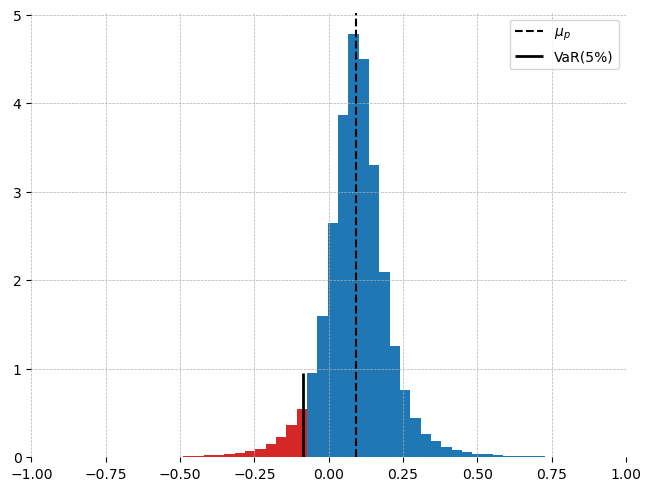

In [96]:
# Create a distribution to represent the portfolio
d = stats.t(3, loc=mu_p, scale=sigma_p)

# Draw returns
returns = d.rvs(100_000)

# Compute the 5% quantile
q05 = np.quantile(returns, 0.05)

# Plot a histogram of returns
fig, ax = plt.subplots()
N, bins, patches = ax.hist(returns, bins=250, density=True)
for n, b, patch in zip(N, bins, patches):
    if b <= q05:
        patch.set_facecolor('tab:red')
ax.axvline(mu_p, color='k', ls='--', label=r'$\mu_p$')
q05_line_loc = np.flatnonzero(bins < q05)[-1] + 1
ax.vlines(q05, 0, N[q05_line_loc], color='k', label='VaR(5%)', lw=2)
ax.legend()
ax.set_xlim(-1, 1)
plt.show()

In [97]:
print(f"Monte carlo estimate of VaR(5%): {q05:0.2%}")

Monte carlo estimate of VaR(5%): -8.61%


# Section 5-6-7.4

**N Risky Assets Portfolio and one Risk free Asset**

Given three assets characterized by:

| Asset | Expected Return (in %) | Standard Deviation (in %) |
|-------|------------------------|--------------------------|
| 1     | 14                     | 6                        |
| 2     | 8                      | 4                        |
| 3     | 19                     | 12                       |

And the following correlation coefficients:

|       | Stock 1 | Stock 2 | Stock 3 |
|-------|---------|---------|---------|
| Stock 1 | 1       | 0.3     | 0.2     |
| Stock 2 | 0.3     | 1       | 0.4     |
| Stock 3 | 0.2     | 0.4     | 1       |

The risk-free rate is 4%, and short selling is authorized.


## Question 1

Determine the market portfolio composition.

In [106]:
data = np.array([[0.14, 0.08, 0.19],
                 [0.06, 0.04, 0.12]])

df = pd.DataFrame(data, columns=['Asset 1', 'Asset 2', 'Asset 3'], index=['mean', 'std']).T
df

,mean,std
Asset 1,0.14,0.06
Asset 2,0.08,0.04
Asset 3,0.19,0.12


First, this question is asking for the tangency portfolio. Since we have multiple assets, we're getting into linear algebra land. If you have a calculator that can do matrices, your life is going to be a lot easier on these questions.

We had previously found a formula for the tangency portfolio when there are two risky assets. It turns out this formula comes from the solution to a system of linear equations, which can be generalized as:

$$\mu - r_f = \Sigma Z$$

Where:

- $\mu - rf$ is a **column vector** of asset means
- $\Sigma$ is the **covariance matrix** of market assets
- $Z$ is a **column vector** of relative portfolio weights. To get the actual weights, we'll have to compute $w_i = \frac{z_i}{\sum Z}$

For this question, written all out, it looks like this:

$$\begin{bmatrix} \mu_1 - r_f \\ \mu_2 - r_f \\ \mu_3 - r_f \end{bmatrix} = 
    \begin{bmatrix} \sigma_{1,1} & \sigma_{1,2} & \sigma_{1,3} \\
                    \sigma_{2,1} & \sigma_{2,2} & \sigma_{2,3} \\
                    \sigma_{3,1} & \sigma_{3,2} & \sigma_{3,3} \end{bmatrix} \begin{bmatrix} Z_1 \\ Z_2 \\ Z_3 \end{bmatrix}$$
                    
If you're not comfortable with this notation, realize that it is just a system of three linear equations:

$$\begin{align} \mu_1 - rf &=  \sigma_{1 ,1} Z_1 + \sigma_{1, 2} Z_2 + \sigma_{1,3} Z_3 \\
                \mu_2 - rf &=  \sigma_{2 ,1} Z_1 + \sigma_{2, 2} Z_2 + \sigma_{2,3} Z_3 \\
                \mu_3 - rf &=  \sigma_{3 ,1} Z_1 + \sigma_{3, 2} Z_2 + \sigma_{3,3} Z_3 \\ \end{align}$$
                
In all of these equations, $\sigma_{x,y}$ is $\text{Cov}(x, y)$.

Notice that we're not given these covarainces, we have to compute them from $\sigma_{x,y} = \rho_{x,y} \sigma_x \sigma_y$.

You can do these one by one, or you can do them all in one go if you notice that:

$$\Sigma = \text{Diag}(\sigma) \rho \text{Diag}(\sigma) = 
    \begin{bmatrix} \sigma_1 & 0 & 0 \\
                    0 & \sigma_2 & 0 \\
                    0 & 0 & \sigma_3 \end{bmatrix}
    \begin{bmatrix} 1 & \rho_{1,2} & \rho_{1,3} \\
                    \rho_{2,1} & 1 & \rho_{2,3} \\
                    \rho_{3,1} & \rho_{3,2} & 1 \end{bmatrix}
  \begin{bmatrix} \sigma_1 & 0 & 0 \\
                    0 & \sigma_2 & 0 \\
                    0 & 0 & \sigma_3 \end{bmatrix}
$$

So we just need to compute $Z = \Sigma^{-1}(\mu - r_f)$

### Sidebar: Show that this method works

In this little sidebar, I do the linear algebra approach for 2 assets, as show that we get the same formula as the maximization approach.

In [160]:
mu1, mu2 = sp.symbols('mu_1 mu_2')
s1, s2 = sp.symbols('sigma_1 sigma_2')
rho = sp.Symbol('rho')
cov = sp.Matrix([[s1 **2, rho * s1 * s2], [rho * s1 * s2, s2**2]])
rf = sp.Symbol('r_f')

In [166]:
cov_inv = sp.Inverse(cov).doit()
cov_inv

Matrix([
[           -1/(rho**2*sigma_1**2 - sigma_1**2), rho/(rho**2*sigma_1*sigma_2 - sigma_1*sigma_2)],
[rho/(rho**2*sigma_1*sigma_2 - sigma_1*sigma_2),            -1/(rho**2*sigma_2**2 - sigma_2**2)]])

In [167]:
Zs = cov_inv @ sp.Matrix([[mu1 - rf], [mu2 - rf]])

Remember that this method gives relative weights, so we have to divide by the sum of the Zs to get the final formula. We see that this formula is exactly what we had before!

In [169]:
(Zs[0] / (Zs[0] + Zs[1])).simplify()

sigma_2*(rho*sigma_1*(mu_2 - r_f) + sigma_2*(-mu_1 + r_f))/(rho*sigma_1*sigma_2*(mu_1 + mu_2 - 2*r_f) + sigma_1**2*(-mu_2 + r_f) + sigma_2**2*(-mu_1 + r_f))

**Sidebar over** 

In [172]:
# Compute the covariance matrix for the market using Σ = diag(σ) @ ρ @ diag(σ)
ρ = np.array([[1.0, 0.3, 0.2],
              [0.3, 1.0, 0.4],
              [0.2, 0.4, 1.0]])

σ = np.diag(df['std'].values)
σ

array([[0.06, 0.  , 0.  ],
       [0.  , 0.04, 0.  ],
       [0.  , 0.  , 0.12]])

In [173]:
Σ = σ @ ρ @ σ
Σ

array([[0.0036 , 0.00072, 0.00144],
       [0.00072, 0.0016 , 0.00192],
       [0.00144, 0.00192, 0.0144 ]])

In [174]:
# To get the relative weights, solve mu - rf = Σ @ z --> z = Σ^-1 @ (mu - rf)
mu = df['mean'].values.reshape(-1, 1)
rf = 0.04

Z = np.linalg.inv(Σ) @ (mu - rf)
weights = Z.ravel() / Z.sum()
weights

array([0.64881101, 0.15168961, 0.19949937])

## Question 2

Determine the equation of the efficient Frontier. What is the meaning of this line?

This question is asking for the capital market line. We know the formula for it is:

$$r_p = r_f + \frac{\mu_m - r_f}{\sigma_m} \sigma_p$$

We just computed the portfolio weights to make the market portfolio, so we just have to compute the moments for the portfolio and plug them into this equation.

Here again I'm doing it the linear algebra way. Given a vector $w$ of $N$ weights, the portfolio moments are:

$$
\begin{align}
\mu_p &= w^T \mu \\
\sigma^2_p &= w^T \Sigma w
\end{align}
$$

Of course you can do these by hand too. It will just be:

$$
\begin{align} \mu_p &= w_1 \mu_1 + w_2 \mu_2 + w_3 \mu_3 \\
                \sigma_p &= w_1^2 \sigma_1^2 + w_2^2 \sigma_2^2 + w_3^2 \sigma_3^2 + 2 w_1 w_2 \rho_{1,2}\sigma_1\sigma_2 + 2 w_1 w_3 \rho_{1,3} \sigma_1 \sigma_3 + 2 w_2 w_3 \rho_{2,3} \sigma_2 \sigma_3 \end{align}
$$

Notice that in the by hand method, you have $N$ square terms (one for each asset), then you have $\frac{N(N+1)}{2}$ cross-terms, each multipled by 2 (because correlations are symmetrical).

In [176]:
# compute portfolio moments
mu_p = weights @ mu.ravel()
sigma2_p = weights @ Σ @ weights
sigma_p = np.sqrt(sigma2_p)

print(f'Portfolio mean: {mu_p:0.2%}')
print(f'Portfolio variance: {sigma2_p:0.2%}')
print(f'Portfolio std: {sigma_p:0.2%}')
print(f'Portfolio sharpe ratio: {(mu_p - rf) / sigma_p:0.2f}')

Portfolio mean: 14.09%
Portfolio variance: 0.28%
Portfolio std: 5.25%
Portfolio sharpe ratio: 1.92


So the formula is:

$$r_p = 0.03 + 1.92\sigma_p$$

## Question 3

To get an expected return of 8%, how should you build your portfolio?

We just have to choose a weight $\alpha$ on the market portfolio such that the returns on the resulting portfolio are 0.08:

$$\begin{align}
r_p &= \alpha r_m + (1 - \alpha) r_f \\
r_p - r_f &= \alpha (r_m - r_f) \\
\alpha &= \frac{r_p - r_f}{r_m - r_f}
\end{align}$$

Now just plug in numbers

In [179]:
alpha_08 = (0.08 - rf) / (mu_p - rf)
print(f'Share of market portfolio in total portfolio: {alpha_08:0.2%}')

Share of market portfolio in total portfolio: 39.65%


The question doesn't ask for it, but we can also get the volitility of the portfolio by using the CML

In [181]:
print(f'Volitility of portfolio when r_p = 0.08: {(0.08 - 0.03) / 1.92:0.2%}')

Volitility of portfolio when r_p = 0.08: 2.60%
